---

# **Product Backorders**

---

## Introduction
A **product backorder** is a customer order that has not been fulfilled. Product backorder may be the result of strong sales performance (e.g. the product is in such high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs). Hence, this project aims to develop a product that can predict if a product will go on backorder not.

---

## Problem Statement
1.   What are the variables that lead to backorder?
2.   What are the relationship between the varialbes?

---

## Hypothesis
National inventory and sales performance are directly correlated with backorder.

---

## Objective
1.   To identify the relationship between the attributes
2.   To identify which attributes correlates most to backorder
3.   To predict backorder by selecting relevant attributes

---

## Dataset
From the [Backorders Wiki Page](https://github.com/AasthaMadan/Product-Backorders/wiki/Product-back-orders-prediction), we can find the information about the dataset

*   sku – Random ID for the product
*   national_inv – Current inventory level for the part
*   lead_time – Transit time for product (if available)
*   in_transit_qty – Amount of product in transit from source
*   forecast_3_month – Forecast sales for the next 3 months
*   forecast_6_month – Forecast sales for the next 6 months
*   forecast_9_month – Forecast sales for the next 9 months
*   sales_1_month – Sales quantity for the prior 1 month time period
*   sales_3_month – Sales quantity for the prior 3 month time period
*   sales_6_month – Sales quantity for the prior 6 month time period
*   sales_9_month – Sales quantity for the prior 9 month time period
*   min_bank – Minimum recommend amount to stock
*   potential_issue – Source issue for part identified
*   pieces_past_due – Parts overdue from source
*   perf_6_month_avg – Source performance for prior 6 month period
*   perf_12_month_avg – Source performance for prior 12 month period
*   local_bo_qty – Amount of stock orders overdue
*   deck_risk – Part risk flag
*   oe_constraint – Part risk flag
*   ppap_risk – Part risk flag
*   stop_auto_buy – Part risk flag
*   rev_stop – Part risk flag
*   went_on_backorder – Product actually went on backorder.

---






# **Exploratory Data Analysis**

Exploratory data analysis is the inital investigation of data so as to discover patterns, spot anomalies, and test hypothesis with the help of statistics.

To do this, we will first import our datasets and merge them using the pandas library

In [ ]:
import pandas as pd

# Load train and test data
train_df = pd.read_csv("drive/MyDrive/data_mining_portfolio/Kaggle_Training_Dataset_v2.csv")
test_df = pd.read_csv("drive/MyDrive/data_mining_portfolio/Kaggle_Test_Dataset_v2.csv")

# Merge both the datasets
merged_df = pd.concat([train_df, test_df])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Next, we can look at some properties of the dataset such as shape, data types, and part of the actual data itself. 

In [ ]:
# Size of dataset
print("Shape:\n", merged_df.shape)

# Look at the data types
print("\nDatatypes:\n", merged_df.dtypes)

# An initial look at the 1st 5 rows 
print("\nFirst 5:\n", merged_df.head())

# The last 5 rows
print("\nLast5:\n", merged_df.tail())

# Count number of null values for each variable
print("\nNulls:\n", merged_df.isnull().sum())

Shape:
 (1929937, 23)

Datatypes:
 sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

First 5:
        sku  national_inv  lead_time  ...  stop_auto_buy  rev_stop  went_on_backorder
0  1026827           0.0        NaN  ...            Yes        No                 No
1  1043384           2.0        9.0  ...            Yes        No                 No
2  1043696        

We find out that:

*   We can see there's almost 2 million records with 23 different attributes,
*   15 of these attributes are numerical
*   8 of these attributes are non-numerical
*   lead_time has 115619 null values

---

We now aggregate the dataset, first a summary of the overall dataset, then a summary with separating the classes.

In [ ]:
# Select numerical parameters
num_params = ['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']

# Describe data
print("\nSummary:\n", merged_df[num_params].describe().transpose())

# Pivot backorder
print("\nBackorder:\n", merged_df.pivot_table(values=num_params,index=['went_on_backorder']).transpose())

# Class proportion for target variable
print("\nProportion of Backorder before SMOTE:\n", merged_df['went_on_backorder'].value_counts(normalize=True))


Summary:
                        count        mean  ...    75%         max
national_inv       1929935.0  496.568259  ...  80.00  12334404.0
lead_time          1814318.0    7.878627  ...   9.00        52.0
in_transit_qty     1929935.0   43.064397  ...   0.00    489408.0
forecast_3_month   1929935.0  178.539864  ...   4.00   1510592.0
forecast_6_month   1929935.0  345.465893  ...  12.00   2461360.0
forecast_9_month   1929935.0  506.606748  ...  20.00   3777304.0
sales_1_month      1929935.0   55.368164  ...   4.00    741774.0
sales_3_month      1929935.0  174.663858  ...  15.00   1105478.0
sales_6_month      1929935.0  341.565349  ...  31.00   2146625.0
sales_9_month      1929935.0  523.577094  ...  47.00   3205172.0
min_bank           1929935.0   52.776366  ...   3.00    313319.0
pieces_past_due    1929935.0    2.016193  ...   0.00    146496.0
perf_6_month_avg   1929935.0   -6.899870  ...   0.96         1.0
perf_12_month_avg  1929935.0   -6.462343  ...   0.95         1.0
local_bo_qty  

We find that overall:
*   The mean inventory of products is about 500
*   The mean product in transit is 43
*   The mean sales per month is 55

When separated by class:
*   The product that did not go on backorders, have high inventory, but also higher sales and quantity in transit.
*   The product that go on backorders, have low inventory, but also lower sales and quantity in transit.
*   **For products that go on backorder, the sales is higher than the inventory, whereas for products that do not go on backorder, the sales is lower than the inventory.**

This confirms our hypothesis, in that national inventory and sales performance are directly correlated with backorder.

---

Now we can construct a correlation matrix to see the correlation between each attributes. 

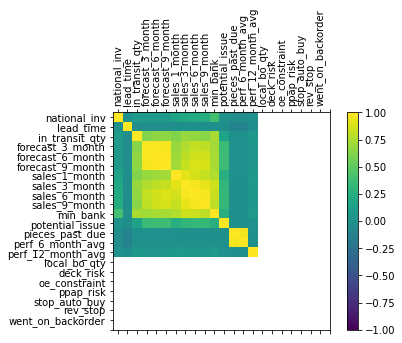

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Correlation Matrix Plot of all variables
varnames=list(merged_df)[1:]    
correlations = merged_df[varnames].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(varnames,rotation=90)
ax.set_yticklabels(varnames)
plt.show()

We can see that:

*   Sales and forecast variables are highly correlated.

This means that, when doing our prediction, we don't have to use every attributes that correlate highly with each other. Using fewer attributes may speed up training time.

---

## Tableau EDA

We can now perform more complex data analysis on Tableau. The first chart we will look at is **Real sales vs forecast**:

![](https://drive.google.com/uc?export=view&id=1ssA2Qwh7XkgwkKPI5bjAfJAAkbpfSH0M)

We see that the prediction in the original dataset correlates highly with the real sales. We can investigate further by looking at the "yes" and "no" backorder products separately.

![](https://drive.google.com/uc?export=view&id=1YSdv74N5oC-8aDxpzRJ1AcJjlBlCY56a)

For the "no" backorder products, the forecasted sales and the actual sales are the same. But for the "yes" backorder products, there is a disparity between the forecasted sales and the actual sales. 

**The actual sales are higher than the forecasted sales for backorder products.**

---


# **Data Pre-processing**
Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often inconsistent and incomplete, and we need to transform it into a format that our machine learning models can understand.

First of all, we need to get rid of the null value sas there are many null values in the dataset. We also remove the 'SKU' column as it is the ID of the product and are not meaningful in any way.

After that, we can compare the proportion of "Yes" and "No" backorder products:

In [ ]:
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE

# Replace NaN values in lead_time
merged_df.lead_time = merged_df.lead_time.fillna(merged_df.lead_time.median())

# Change the -99 placeholder to NA for perf_6_month_avg and perf_12_month_avg
merged_df['perf_6_month_avg'] = merged_df['perf_6_month_avg'].replace(-99, np.NaN)
merged_df['perf_12_month_avg'] = merged_df['perf_12_month_avg'].replace(-99, np.NaN)

# Drop rows with null values 
merged_df = merged_df.dropna()

# Remove the sku column
merged_df = merged_df.drop(["sku"], axis=1)

# Class proportion for target variable
print("\nProportion of Backorder before SMOTE:\n", merged_df['went_on_backorder'].value_counts(normalize=True))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)



Proportion of Backorder before SMOTE:
 No     0.992462
Yes    0.007538
Name: went_on_backorder, dtype: float64


And find out that 98.13% of products are "Yes" backorder and only 1.87% are "No" backorder.

---

Next, we want to transform the 'Yes' and 'No' values to '1' and '0', as some models are not able to work with non-numerical values. Also, we want to remove the records where forecast and sales are 0, because these products do not contribute to our prediction.

In [ ]:
# Convert from non-numerical to numerical
cat_params = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               'stop_auto_buy', 'rev_stop', 'went_on_backorder']

for param in cat_params:
  merged_df[param] = (merged_df[param] == 'Yes').astype(int)

# Remove records where forecast and sales are 0 
attributes = ['forecast_3_month', 'forecast_6_month', 'forecast_9_month',
              'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
              
for attr in attributes:
  merged_df = merged_df.drop(merged_df[merged_df[attr] == 0].index)

As the data is still vastly unbalanced, we need to balance it somehow. We can do this by applying the SMOTE technique. After that, we can save it to a csv file for future use.

In [ ]:
# SMOTE teachnique to balance dataset
X = merged_df.drop(['went_on_backorder'], axis = 1)
y = merged_df['went_on_backorder']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

# Rename labels in final dataset
labels = merged_df.columns
df.columns = labels

# Save to csv
df.to_csv(r'data.csv')

# Class proportion before SMOTE
print("\nProportion of Backorder before SMOTE:\n", merged_df['went_on_backorder'].value_counts(normalize=True))

# Class proportion after SMOTE
print("\nProportion of Backorder after SMOTE:'n", df['went_on_backorder'].value_counts(normalize=True))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



Proportion of Backorder before SMOTE:
 0    0.981289
1    0.018711
Name: went_on_backorder, dtype: float64

Proportion of Backorder after SMOTE:'n 1    0.5
0    0.5
Name: went_on_backorder, dtype: float64


---
# **Descriptive Data Mining**

Descriptive data mining is applying data mining techniques to determine the similarities in the data and to find existing patterns.

We will apply 2 descriptive data mining techniques here:
1.   A Priori Association Rules
2.   K-Means Clustering

---

## Association Rules
Association Rules calculate how frequent the items appear together

---

### RapidMiner
We first run this on RapidMiner. The data is first discretized and transformed to Binomial before we process it. It should be noted that we are running FPGrowth in RapidMiner because it does not have A Priori. We use A Priori Association Rules on Colab because FPgrowth is unavailable here. However, they are very similar algorithms. The figure below shows the operators used in RapidMiner:

![](https://drive.google.com/uc?export=view&id=1TzFOGjPmjdhpcyIp5m4Wu2CZVgmtbQiy)

And the two figures below shows the output:

![](https://drive.google.com/uc?export=view&id=1ZCb2ceXNirSBVqiW_AqT4beIq0WpxT3w)

![](https://drive.google.com/uc?export=view&id=1_EZf5p8_SjrZYzHy3qVvoLeX3y4J2_mM)

We can conclude from the results that, when
*   oe_constraint
*   potential_issue
*   desk_risk

is **False**, then rev_stop will most probably also be **False**

Next, we export the data that we have processed here into a CSV that we can use on Colab.

---

We can now use the data that is exported and run A Priori Association Rules on Colab. 

In [ ]:
!pip install -q mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Read data
disc_df = pd.read_csv("drive/MyDrive/data_mining_portfolio/discretized.csv")

# Analyze frequent itemsets and write to csv
ap = apriori(disc_df, min_support=0.95, use_colnames=True)
print("\nFrequent Itemsets:\n", ap)
ap.to_csv('itemsets.csv')

# Create association rules and write to csv
rules = association_rules(ap, metric="confidence", min_threshold=0.8)
print("\nAssociation Rules:\n", rules)
rules.to_csv('rules.csv')


Frequent Itemsets:
      support                                           itemsets
0   0.998698            (potential_issue = range1 [-? - 0.500])
1   0.950488                  (deck_risk = range1 [-? - 0.500])
2   0.999755              (oe_constraint = range1 [-? - 0.500])
3   0.960804                   (stop_auto_buy = range2 [0 - ?])
4   1.000000                       (rev_stop = range1 [-? - 0])
5   0.998453  (oe_constraint = range1 [-? - 0.500], potentia...
6   0.959502  (stop_auto_buy = range2 [0 - ?], potential_iss...
7   0.998698  (rev_stop = range1 [-? - 0], potential_issue =...
8   0.950243  (oe_constraint = range1 [-? - 0.500], deck_ris...
9   0.950488  (rev_stop = range1 [-? - 0], deck_risk = range...
10  0.960559  (oe_constraint = range1 [-? - 0.500], stop_aut...
11  0.999755  (oe_constraint = range1 [-? - 0.500], rev_stop...
12  0.960804  (stop_auto_buy = range2 [0 - ?], rev_stop = ra...
13  0.959257  (oe_constraint = range1 [-? - 0.500], stop_aut...
14  0.998453  (oe_c

We managed to obtain very similar results, whereby when

*   oe_constraint
*   potential_issue
*   desk_risk

is **False**, the rev_stop is also **False**.

---

## Clustering

Clustering is an unsupervised machine learning algorithm that divide the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

The clustering algorithm we use is K-Means as it is one of the fastest clustering algorithms. We will use the Davies-Bouldin Index to measure its performance. A high Davies-Bouldin score means that the clusters are very similar to each other, whereas a low Davies-Bouldin score means that the clusters are well separated from each other. **In general, we want a low score.**

---

## RapidMiner
We first run it on RapidMiner. We are only using the "Yes" backorder products as using the "No" backorder products will turn the task into a classification task. The task is repeated 5 times for 5 different number of clusters. Figure below shows the operators used in RapidMiner:
![](https://drive.google.com/uc?export=view&id=1G67TbF00e4_7DxKVIBIeGwqBAOS7CN83)

Next, we can run it on Python, starting with 2 clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Select only backorder data
bo_df = df[df['went_on_backorder'] == 1]
X = bo_df.drop(columns='went_on_backorder', axis=0)

# Clustering
KMmodel = KMeans(n_clusters=2)
KMpred = KMmodel.fit_predict(X)
KMlabels = KMmodel.labels_
KMbi = davies_bouldin_score(X, KMlabels)
print("K-Means with 2 clusters")
print("Davies-Bouldin Index:", KMbi)

K-Means with 2 clusters
Davies-Bouldin Index: 0.4324246018578214


We obtained a Davies-Bouldin score of 0.432.

---

Now we try with 4 clusters.

In [ ]:
# Clustering
KMmodel = KMeans(n_clusters=4)
KMpred = KMmodel.fit_predict(X)
KMlabels = KMmodel.labels_
KMbi = davies_bouldin_score(X, KMlabels)
print("K-Means with 4 clusters")
print("Davies-Bouldin Index:", KMbi)

K-Means with 4 clusters
Davies-Bouldin Index: 0.48389029593856103


And obtained a score of 0.484

---

Finally, we test with 3 clusters

In [ ]:
# Clustering
KMmodel = KMeans(n_clusters=3)
KMpred = KMmodel.fit_predict(X)
KMlabels = KMmodel.labels_
KMbi = davies_bouldin_score(X, KMlabels)
print("K-Means with 3 clusters")
print("Davies-Bouldin Index:", KMbi)

K-Means with 3 clusters
Davies-Bouldin Index: 0.31455921648427315


And obtained a score of 0.315. This is the best result we have obtained so we will use this to cluster our data.

---

The figure below shows the Davies-Bouldin Index for different clusters on RapidMiner and Colab. As we can see, the score on both platforms converged at k=3, which is a good sign that k=3 is the optimal number of clusters.
![](https://drive.google.com/uc?export=view&id=16JS_IQezVKCyqOCI3JMJuwLuLIsuAGFR)

---

Finally, using k=3, we can analyse the properties of the different clusters.

In [ ]:
# Add cluster column
KM = X.copy()
KM['cluster'] = pd.Series(KMpred, index=KM.index)

# Separate into different clusters
cl0 = KM.loc[KM['cluster'] == 0]
cl1 = KM.loc[KM['cluster'] == 1]
cl2 = KM.loc[KM['cluster'] == 2]

# Find out number of instances in each cluster
print("Cluster_0: ", cl0.shape)
print("Cluster_1: ", cl1.shape)
print("Cluster_2: ", cl2.shape)

# Aggregate the different clusters
cl0_mean = cl0.agg('mean').drop('cluster')
cl1_mean = cl1.agg('mean').drop('cluster')
cl2_mean = cl2.agg('mean').drop('cluster')

pd.concat([cl0_mean, cl1_mean, cl2_mean], axis=1)

Cluster_0:  (346361, 22)
Cluster_1:  (828, 22)
Cluster_2:  (40, 22)


,0,1,2
national_inv,9.537295,5496.660665,-160.352666
lead_time,6.726865,5.467231,2.640487
in_transit_qty,4.172067,268.263090,3.942969
forecast_3_month,137.624462,11495.867719,66753.853709
forecast_6_month,202.867500,22109.278648,122095.135061
forecast_9_month,268.933675,32379.571690,149564.956099
sales_1_month,32.275657,2451.704266,789.577844
sales_3_month,87.078676,9300.531564,2737.897364
sales_6_month,151.454007,17318.942791,5208.318507
sales_9_month,219.768862,24294.277592,5732.641159


We find out that:

*   Most items are in the Cluster_0
*   Cluster_1 and Cluster_2 are outliers
*   Cluster_0 has a low inventory at an average of 9.72, and a higher sales at 32.59.
*   Cluster_1 has a high inventory at 6501.40 and a lower sales at 2487.
*   Cluster_2 has a negative inventory at -380.10 and a positive sales at 861.34.

**Cluster 0 and Cluster 2 confirms our results earlier that, a higher sales than inventory will result in a backorder.**
On the other hand, Cluster_1 has a lower sales than inventory, however there are only small a small quantity of items that are in this cluster. Cluster_1 is the outlier.

---


# **Predictive Data Mining**

Predictive data mining allows us to predict events that has not happened yet. This type of data mining is done for the purpose of using business intelligence or other data to forecast or predict trends. This type of data mining can help business leaders make better decisions and can add value to the efforts of the analytics team.

For this project, we are comparing Random Forest and Adaboost. Random forests are an ensemble learning method for classification. It works by constructing a multitude of Decision Trees at training time and outputting the class that is the mode of the classes.

Adaboost is also an ensemble learning method, but can be used in conjunction with many other types of learning algorithms instead of just Decision Tree.

Note that we do not use the forecast because they are predicted values, and we do not use min_bank because it is a 'recommended' value. We only want actual numbers for our prediction.

---

### RapidMiner
First, we run this on RapidMiner. Using the default max_depth=10 for both Random Forest and AdaBoost, we calculate the performance on different train-test ratios, 80:20 and 70:30. The figure below shows our operators on RapidMiner:

![](https://drive.google.com/uc?export=view&id=19ekMULjfMtDli8MApstGBsRMt079vgvK)

The figure below shows the tabulated results:

![](https://drive.google.com/uc?export=view&id=1sl5wHuQXs6UAgKh_It9BGlOnrtRYKFdl)

We can see that, overall, Random Forest outperformed AdaBoost by as much as 10% in terms of precision.

---



## 30% Test Ratio

We can now test in on Colab. Starting with 30% testing ratio and a max_depth=1 on Random Forest,

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from joblib import dump
from time import perf_counter

# selecting features that we want
X = df.drop(columns=['went_on_backorder', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'perf_12_month_avg', 'sales_1_month', 'sales_3_month', 'sales_9_month', 'min_bank'], axis=0)
Y = df['went_on_backorder']

# test size
test_size = 0.3

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
print("Train to test ratio:", 1-test_size, test_size)

# training random forest
start = perf_counter()
RFmodel = RandomForestClassifier(max_depth=1)
RFmodel.fit(X_train, Y_train)

# testing random forest
RFpred = RFmodel.predict(X_test)
RFacc = round(accuracy_score(Y_test, RFpred) * 100, 2)
RFprec = round(precision_score(Y_test, RFpred, average='weighted', zero_division=0) * 100, 2)
RFrec = round(recall_score(Y_test, RFpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("Random Forest", "Accuracy", RFacc, "Precision:", RFprec, "Recall:", RFrec)
print("Random Forest Time Elapsed: ", time_elapsed, " seconds.")

Train to test ratio: 0.7 0.3
Random Forest Accuracy 79.69 Precision: 79.97 Recall: 79.69
Random Forest Time Elapsed:  15.01725381600005  seconds.


We obtained the following results:
*   Accuracy: 79.69%
*   Precision: 79.97%
*   Recall: 79.69%
*   Time elapsed: 15 seconds

---

Now we use a max_depth=10 

In [ ]:
# training random forest
start = perf_counter()
RFmodel = RandomForestClassifier(max_depth=10)
RFmodel.fit(X_train, Y_train)

# testing random forest
RFpred = RFmodel.predict(X_test)
RFacc = round(accuracy_score(Y_test, RFpred) * 100, 2)
RFprec = round(precision_score(Y_test, RFpred, average='weighted', zero_division=0) * 100, 2)
RFrec = round(recall_score(Y_test, RFpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("Random Forest", "Accuracy", RFacc, "Precision:", RFprec, "Recall:", RFrec)
print("Random Forest Time Elapsed: ", time_elapsed, " seconds.")

Random Forest Accuracy 90.64 Precision: 90.77 Recall: 90.64
Random Forest Time Elapsed:  74.78256261299993  seconds.


And obtained the following results:
*   Accuracy: 90.64%
*   Precision: 90.77%
*   Recall: 90.64%
*   Time elapsed: 75 seconds

We can see that by increase the number of max_depth, we greatly increased the time it took to train the model.

---

We do the same thing again with max_depth=25 

In [ ]:
# training random forest
start = perf_counter()
RFmodel = RandomForestClassifier(max_depth=25)
RFmodel.fit(X_train, Y_train)

# testing random forest
RFpred = RFmodel.predict(X_test)
RFacc = round(accuracy_score(Y_test, RFpred) * 100, 2)
RFprec = round(precision_score(Y_test, RFpred, average='weighted', zero_division=0) * 100, 2)
RFrec = round(recall_score(Y_test, RFpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("Random Forest", "Accuracy", RFacc, "Precision:", RFprec, "Recall:", RFrec)
print("Random Forest Time Elapsed: ", time_elapsed, " seconds.")

Random Forest Accuracy 97.76 Precision: 97.77 Recall: 97.76
Random Forest Time Elapsed:  112.1124660160001  seconds.


And obtained the following results:
*   Accuracy: 97.76%
*   Precision: 97.77%
*   Recall: 97.76%
*   Time elapsed: 112 seconds

This is the best result with Random Forest so far. However, we can not know if we are overfitting until we test our model on the data product

---

Now, we can train our Adaboost model. First we use Naive Bayes, particularly the Gaussian Naive Bayes, as the base estimator.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# training adaboost
start = perf_counter()
ABmodel = AdaBoostClassifier(base_estimator=GaussianNB())
ABmodel.fit(X_train, Y_train)

# testing adaboost
ABpred = ABmodel.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 65.98 Precision: 68.65 Recall: 65.98
AdaBoost Time Elapsed:  24.231937038999945  seconds.


 We obtained the following results:
*   Accuracy: 65.98%
*   Precision: 68.65%
*   Recall: 65.98%
*   Time elapsed: 24 seconds

This is not a good result, so we will not use this model

---

Next, we try the ExtraTreeClassifier as the base estimator. 

In [ ]:
from sklearn.tree import ExtraTreeClassifier

# training adaboost
start = perf_counter()
ABmodel = AdaBoostClassifier(base_estimator=ExtraTreeClassifier())
ABmodel.fit(X_train, Y_train)

# testing adaboost
ABpred = ABmodel.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 96.89 Precision: 96.89 Recall: 96.89
AdaBoost Time Elapsed:  44.81217424199997  seconds.


We obtained the following results:
*   Accuracy: 96.89%
*   Precision: 96.89%
*   Recall: 96.89%
*   Time elapsed: 44 seconds

This is a good result, but we can do better.

---

Now we can test the default base estimator, which is the Decision Tree if no parameters are given. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# training adaboost
start = perf_counter()
ABmodel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ABmodel.fit(X_train, Y_train)

# testing adaboost
ABpred = ABmodel.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 98.43 Precision: 98.43 Recall: 98.43
AdaBoost Time Elapsed:  214.69023468800003  seconds.


We obtained the following results:
*   Accuracy: 98.43%
*   Precision: 98.43%
*   Recall: 98.43%
*   Time elapsed: 215 seconds

The accuracy, precision, and recall are very high, however it took much longer to train. 

---

Now that we have determined Decision Tree is a good base estimator, we can try it with max_depth=1. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# training adaboost
start = perf_counter()
ABmodel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
ABmodel.fit(X_train, Y_train)

# testing adaboost
ABpred = ABmodel.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 87.32 Precision: 87.35 Recall: 87.32
AdaBoost Time Elapsed:  30.614752263000014  seconds.


We obtained the following results:
*   Accuracy: 87.32%
*   Precision: 87.35%
*   Recall: 87.32%
*   Time elapsed: 31 seconds

The time elapsed is much lower, but the performance is still relatively good.

---

Now we try with max_depth=25 

In [ ]:
# training adaboost
start = perf_counter()
ABmodel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25))
ABmodel.fit(X_train, Y_train)

# testing adaboost
ABpred = ABmodel.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 98.7 Precision: 98.7 Recall: 98.7
AdaBoost Time Elapsed:  194.90734541999996  seconds.


And obtained the following results:
*   Accuracy: 98.70%
*   Precision: 98.70%
*   Recall: 98.70%
*   Time elapsed: 195 seconds

This is the longest time elapsed so far, but also the best performance in terms of accuracy, precision, and recall. Again, we will not know if the model is overfitting the data until we test it on our data product.

---
## 20% Test Ratio

Now, we can try to run the same process with 20% testing ratio instead. Starting with Random Forest with max_depth=1, 

In [ ]:
# test size
test_size = 0.2

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
print("Train to test ratio:", 1-test_size, test_size)

# training random forest
start = perf_counter()
RF_1 = RandomForestClassifier(max_depth=1)
RF_1.fit(X_train, Y_train)

# testing random forest
RFpred = RF_1.predict(X_test)
RFacc = round(accuracy_score(Y_test, RFpred) * 100, 2)
RFprec = round(precision_score(Y_test, RFpred, average='weighted', zero_division=0) * 100, 2)
RFrec = round(recall_score(Y_test, RFpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("Random Forest", "Accuracy", RFacc, "Precision:", RFprec, "Recall:", RFrec)
print("Random Forest Time Elapsed: ", time_elapsed, " seconds.")

Train to test ratio: 0.8 0.2
Random Forest Accuracy 78.69 Precision: 78.83 Recall: 78.69
Random Forest Time Elapsed:  15.100225382999952  seconds.


we obtained the results:
*   Accuracy: 78.69%
*   Precision: 78.83%
*   Recall: 78.69%
*   Time elapsed: 15 seconds

The time elapsed is very low and the performance is relatively high.

---

We do the same thing but with max_depth=10. 

In [ ]:
# training random forest
start = perf_counter()
RF_10 = RandomForestClassifier(max_depth=10)
RF_10.fit(X_train, Y_train)

# testing random forest
RFpred = RF_10.predict(X_test)
RFacc = round(accuracy_score(Y_test, RFpred) * 100, 2)
RFprec = round(precision_score(Y_test, RFpred, average='weighted', zero_division=0) * 100, 2)
RFrec = round(recall_score(Y_test, RFpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("Random Forest", "Accuracy", RFacc, "Precision:", RFprec, "Recall:", RFrec)
print("Random Forest Time Elapsed: ", time_elapsed, " seconds.")

Random Forest Accuracy 90.76 Precision: 90.9 Recall: 90.76
Random Forest Time Elapsed:  74.43826018799996  seconds.


We obtained the results:
*   Accuracy: 90.76%
*   Precision: 90.90%
*   Recall: 90.76%
*   Time elapsed: 74 seconds

This is a very good result.

---

Now let's try max_depth=25



In [ ]:
# training random forest
start = perf_counter()
RF_25 = RandomForestClassifier(max_depth=25)
RF_25.fit(X_train, Y_train)

# testing random forest
RFpred = RF_25.predict(X_test)
RFacc = round(accuracy_score(Y_test, RFpred) * 100, 2)
RFprec = round(precision_score(Y_test, RFpred, average='weighted', zero_division=0) * 100, 2)
RFrec = round(recall_score(Y_test, RFpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("Random Forest", "Accuracy", RFacc, "Precision:", RFprec, "Recall:", RFrec)
print("Random Forest Time Elapsed: ", time_elapsed, " seconds.")

Random Forest Accuracy 97.86 Precision: 97.87 Recall: 97.86
Random Forest Time Elapsed:  114.00814012799992  seconds.


We get the results:
*   Accuracy: 97.86%
*   Precision: 97.87%
*   Recall: 97.86%
*   Time elapsed: 114 seconds

This is the best performance for our Random Forest.

---

We do the same thing for Adaboost, starting with max_depth=1. 

In [ ]:
# training adaboost
start = perf_counter()
AB_1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
AB_1.fit(X_train, Y_train)

# testing adaboost
ABpred = AB_1.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 87.38 Precision: 87.41 Recall: 87.38
AdaBoost Time Elapsed:  31.59044422099987  seconds.


We obtained the results:
*   Accuracy: 87.38%
*   Precision: 87.41%
*   Recall: 87.38%
*   Time elapsed: 32 seconds

We see that when the max_depth are the same, Adaboost outperformed Random Forest, contrary to our results from RapidMiner. Adaboost took twice as long as Random Forest to train.

---

Now we can try max_depth=10

In [ ]:
# training adaboost
start = perf_counter()
AB_10 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10))
AB_10.fit(X_train, Y_train)

# testing adaboost
ABpred = AB_10.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 98.8 Precision: 98.8 Recall: 98.8
AdaBoost Time Elapsed:  218.75830530500002  seconds.


We obtained the results:
*   Accuracy: 98.80%
*   Precision: 98.80%
*   Recall: 98.80%
*   Time elapsed: 219 seconds

---

Finally, we try max_depth=25

In [ ]:
# training adaboost
start = perf_counter()
AB_25 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25))
AB_25.fit(X_train, Y_train)

# testing adaboost
ABpred = AB_25.predict(X_test)
ABacc = round(accuracy_score(Y_test, ABpred) * 100, 2)
ABprec = round(precision_score(Y_test, ABpred, average='weighted', zero_division=0) * 100, 2)
ABrec = round(recall_score(Y_test, ABpred, average='weighted') * 100, 2)
time_elapsed = perf_counter() - start
print("AdaBoost", "Accuracy:", ABacc, "Precision:", ABprec, "Recall:", ABrec)
print("AdaBoost Time Elapsed: ", time_elapsed, " seconds.")

AdaBoost Accuracy: 98.81 Precision: 98.81 Recall: 98.81
AdaBoost Time Elapsed:  244.1962600600002  seconds.


 We obtained the results:
*   Accuracy: 98.81%
*   Precision: 98.81%
*   Recall: 98.81%
*   Time elapsed: 244 seconds

Again, we see a higher slightly performance compared to Random Forest, and again the training took twice as long.

---

We save both the Random Forest and the Adaboost forest, for max_depth=1, max_depth=10 and max_depth=25. This is because we want to test if any of these models are overfitting

In [ ]:
# save model
dump(RF_1, 'RandomForest_1.joblib')
dump(RF_10, 'RandomForest_10.joblib')
dump(RF_25, 'RandomForest_25.joblib')

# save model
dump(AB_1, 'Adaboost_1.joblib')
dump(AB_10, 'Adaboost_10.joblib')
dump(AB_25, 'Adaboost_25.joblib')

['Adaboost_25.joblib']

---
# **Results and Analysis**
---

## Exploratory Data Analysis
From our exploratory data analysis, **we can see that there is indeed a correlation between national inventory, sales performance, and backorder**. Generally, when the sales performance exceeds the national inventory, the product becomes a backorder. Another thing we have learned from the data analysis is that, when the sales performance exceeds the forecasted sales, then there is a high probability that the product will also go on backorder.

---

## Association Rules
With association rules, we can see the relationship between the attributes. The categorical attributes (oe_constraint, desk_risk, rev_stop) frequently go together. **When oe_constraint is false, then there is a high likelihood that rev_stop is also false, and vice versa.**


---


## Clustering
With clustering, we are able to cluster similar instances together. Within the "Yes" backorder products, we see that cluster 0 is the majority cluster, whereas cluster 1 and cluster 2 can be considered as an outlier. **Cluster 0 is low in sales and inventory, cluster 1 is high in both sales and inventory, and cluster 2 is in between the two.**

For cluster 0 and cluster 2, we see that the average sales do exceed the average inventory, which confirms our hypothesis. Cluster 1 contradicts our hypothesis, but it can be considered an outlier to the data.


---


## Predictive Data Mining
After comparing 2 classification algorithms, we find that, in general, **Adaboost has the higher accuracy, precision, and recall than Random Forest**, when max_depth are the same. 

The result here on Colab is different to our results on RapidMiner. On RapidMiner, the performance of Random Forest is higher than Adaboost. I'm not certain why, and I can only hypothesize that it is due to a different implementation of the algorithms.

Here is the tabulated results:

![](https://drive.google.com/uc?export=view&id=1c_dKXSM4crxS4BB-Wej9oz0_UmBXwPSG)

If we look at the file sizes, Adaboost_1, Adaboost_10, Adaboost_25 have file sizes 31.1KB, 2.85MB, and 17.5MB respectively.

On the other hand, RandomForest_1, RandomForest_10, and RandomForest_25 have file sizes 60KB, 6.84MB, and 156MB respectively.

As for time taken to train the model, Adaboost_1, Adaboost_10, Adaboost_25 took 32, 219, and 244 seconds respectively.

RandomForest_1, RandomForest_10, and RandomForest_25 took 15, 74, 114 seconds respectively.

**Adaboost takes twice as long as Random Forest to train.**

However, we won't know if any of these models are overfitting until we test it in the Data product.

# **Data Product**

The data product is built on streamlit because it allows us to rapidly prototype a data product without much coding. Our data product allows the user to manipulate the variables and predict if they will be a backorder or not. We will use these features to predict the backorder:

*  national_inv
*  lead_time
*  In_transit_qty
*  sales_6_month
*  perf_6_months_avg
*  potential_issue
*  pieces_past_due
*  local_bo_qty
*  deck_risk
*  oe_constraint
*  ppap_risk
*  stop_auto_buy
*  rev_stop


In [ ]:
%%writefile app.py

import pandas as pd
import streamlit as st
from joblib import load
from PIL import Image

DATA_PATH = 'data.csv'

@st.cache
def load_data(path):
    data = pd.read_csv(path)
    lowercase = lambda x: str(x).lower()
    data.rename(lowercase, axis='columns', inplace=True)
    return data

data_load_state = st.text('Loading data...')
df = load_data(DATA_PATH)
data_load_state.text("Done loading data!")


def main():
    @st.cache
    def agg_data(df, mode):
        dat = df.agg([mode])
        return dat

    data_agg_state = st.text('Aggregating data...')
    dfMin = agg_data(df, 'min')
    dfMax = agg_data(df, 'max')
    dfMedian = agg_data(df, 'median')
    dfMode = agg_data(df, 'mode')
    data_agg_state.text("Done aggregating data!")

    st.title('Product Backorder')
    st.sidebar.title("Features")

    quant_parameter_list = ['national_inv',
                    'lead_time',
                    'in_transit_qty',
                    'sales_1_month',
                    'pieces_past_due',
                    'perf_6_month_avg',
                    'local_bo_qty']

    qual_parameter_list = ['potential_issue',
                        'deck_risk',
                        'oe_constraint',
                        'ppap_risk',
                        'stop_auto_buy',
                        'rev_stop']

    parameter_input_values=[]
    values=[]
    
    model_select = st.selectbox(label='Select Classification Model', options=(('Adaboost_1', 'Adaboost_10','Adaboost_25', 'RandomForest_1', 'RandomForest_10', 'RandomForest_25')))

    for parameter in quant_parameter_list:
      values = st.sidebar.slider(label=parameter, key=parameter, value=float(dfMedian[parameter]), min_value=float(dfMin[parameter]), max_value=float(dfMax[parameter]), step=0.1)
      parameter_input_values.append(values)

    for parameter in qual_parameter_list:
        ind = dfMode[parameter].iloc[0]
        values = st.sidebar.selectbox(label=parameter, key=parameter, index=int(ind), options=('Yes', 'No'))
        val = 1 if values == 'Yes' else 0
        parameter_input_values.append(val)

    parameter_list = quant_parameter_list + qual_parameter_list
    input_variables=pd.DataFrame([parameter_input_values],columns=parameter_list)
    st.write('\n\n')

    if (model_select == "Adaboost_1"):
      model = load('Adaboost_1.joblib')
    elif (model_select == "Adaboost_10"):
      model = load('Adaboost_10.joblib')
    elif (model_select == "Adaboost_25"):
      model = load('Adaboost_25.joblib')
    elif (model_select == "RandomForest_1"):
      model = load('RandomForest_1.joblib')
    elif (model_select == "RandomForest_10"):
      model = load('RandomForest_10.joblib')
    elif (model_select == "RandomForest_25"):
      model = load('RandomForest_25.joblib')
    else:
      model = load('Adaboost_1.joblib')

    if st.button("Will the product be a backorder?"):
        prediction = model.predict(input_variables)
        pred = 'No' if prediction == 0 else 'Yes'
        st.text(pred)

if __name__ == '__main__':
      main()

Writing app.py


We install ngrok so we can run streamlit on Colab

In [ ]:
!pip -q install streamlit
!pip -q install pyngrok

# Setup a tunnel to the streamlit port 8501
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

     |████████████████████████████████| 7.5MB 5.1MB/s 
     |████████████████████████████████| 4.6MB 59.3MB/s 
     |████████████████████████████████| 163kB 60.6MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 112kB 38.3MB/s 
     |████████████████████████████████| 122kB 52.4MB/s 
     |████████████████████████████████| 71kB 4.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.4.3 which is incompatible.


<NgrokTunnel: "http://234ee057f6da.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py & >/dev/null


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.231.250.250:80

  Stopping...


We can now terminate streamlit and ngrok

In [ ]:
!pgrep streamlit
ngrok.kill()

347


# **Conclusion**

We can test our model in our data product. By logical deduction and also confirmed by our data analysis earlier on, sales that exceed the national inventory will go on a backorder, and vice versa.

So, first we test each model with **national_inv=100000 and sales=1**. The expected output is "No." These are the results obtained:

*   **Adaboost_1**: No
*   **Adaboost_10**: No
*   **Adaboost_25**: No
*   **RandomForest_1**: *Yes*
*   **RandomForest_10**: No
*   **RandomForest_25** : No

We can see that the Random Forest model with max_depth=10 is misclassifying our product.

Next, we test each model with **national_inv=100 and sales=100000**. The expected output is "Yes." These are the results obtained:

*   **Adaboost_1**: Yes
*   **Adaboost_10**: Yes
*   **Adaboost_25**: Yes

*   **RandomForest_1**: Yes
*   **RandomForest_10**: Yes
*   **RandomForest_25** : *No*


Here is the results in tabular form:

![](https://drive.google.com/uc?export=view&id=1efOixdGeKGp70hwKrwku_9X0N2J-bShk)

We can see that **all 3 of the Adaboost models got both test cases correct**. On the other hand, for Random Forest, **only RandomForest_10 got both cases correct**.

Hence, we can conclude that for this dataset, in terms of accuracy and file sizes, Adaboost is the superior model to Random Forest. However, there is a trade-off, and that is the training time. **Adaboost takes twice as long as Random Forest to train.**

Since there is not much difference between Adaboost_10 and Adaboost_25 in terms of accuracy, so we can assume that there is diminishing returns after max_depth=10. Thus, **Adaboost_10 is actually the better model out of the two**.

We should also keep in mind that **accuracy alone is not enough to tell the effectiveness of a model**, and there are many factors that we should consider.